<a href="https://colab.research.google.com/github/Yasminshaker/Data201/blob/main/Proj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project uses a data set called Cancer from kaggle

link: https://www.kaggle.com/datasets/erdemtaha/cancer-data

Its a A data set indicating whether a cancer is benign or malignant according to its individual characteristics.

The objective is to build a model to predict the likelihood of a tumor being malignant based on these measurements; perimeter_mean, area_mean, smoothness_mean, and compactness_mean.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
%matplotlib inline


In [ ]:
cd = pd.read_csv('/content/Cancer.csv')
d = ['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']
cd = cd[d]
cd.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
0,M,17.99,122.80,1001.0,0.11840,0.27760
1,M,20.57,132.90,1326.0,0.08474,0.07864
2,M,19.69,130.00,1203.0,0.10960,0.15990
3,M,11.42,77.58,386.1,0.14250,0.28390
4,M,20.29,135.10,1297.0,0.10030,0.13280


In [ ]:
cd['diagnosis'].value_counts().head(5)

B    357
M    212
Name: diagnosis, dtype: int64

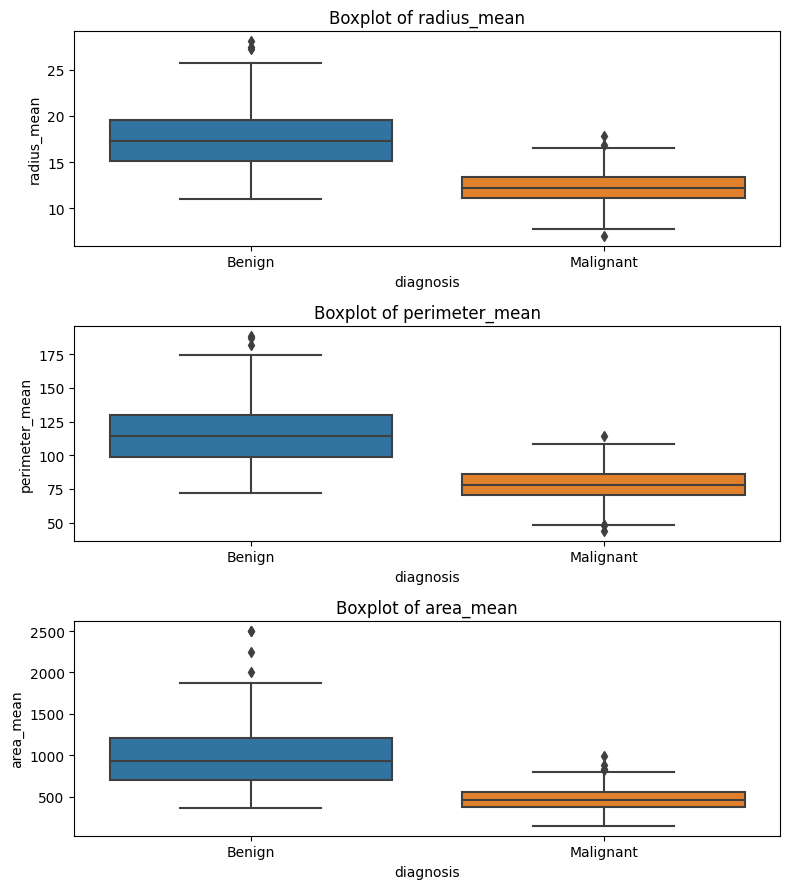

In [ ]:


# Create a new DataFrame with only the relevant columns
selected_data = cd[['diagnosis'] + ['radius_mean', 'perimeter_mean', 'area_mean']]
fig, axes = plt.subplots(nrows=len(['radius_mean', 'perimeter_mean', 'area_mean']),
                         ncols=1,
                         figsize=(8, 3 * len(['radius_mean', 'perimeter_mean', 'area_mean'])))

for i, feature in enumerate(['radius_mean', 'perimeter_mean', 'area_mean']):
    sns.boxplot(x='diagnosis', y=feature, data=cd[['diagnosis'] +
     ['radius_mean', 'perimeter_mean', 'area_mean']],
                ax=axes[i])
    axes[i].set_xticklabels(['Benign', 'Malignant'])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()



In [ ]:
cd['diagnosis'] = cd['diagnosis'].replace({'B': 0, 'M': 1})
cd['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:
X = cd.iloc[:, 1:]
y = cd['diagnosis']
X.head()

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
0,17.99,122.80,1001.0,0.11840,0.27760
1,20.57,132.90,1326.0,0.08474,0.07864
2,19.69,130.00,1203.0,0.10960,0.15990
3,11.42,77.58,386.1,0.14250,0.28390
4,20.29,135.10,1297.0,0.10030,0.13280


In [ ]:
logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

LogReg = LogisticRegression()

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)

y_pred=LogReg.predict(X_test)



In [ ]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [0.60169523]
Coefficients [[-1.08534604 -1.238646   -1.48834614 -0.91542434 -0.9624744 ]]


In [ ]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))


Accuracy 0.8951048951048951
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        53
           1       0.91      0.92      0.92        90

    accuracy                           0.90       143
   macro avg       0.89      0.89      0.89       143
weighted avg       0.89      0.90      0.89       143



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[45,  8],
       [ 7, 83]])

Text(0.5, 427.9555555555555, 'Predicted label')

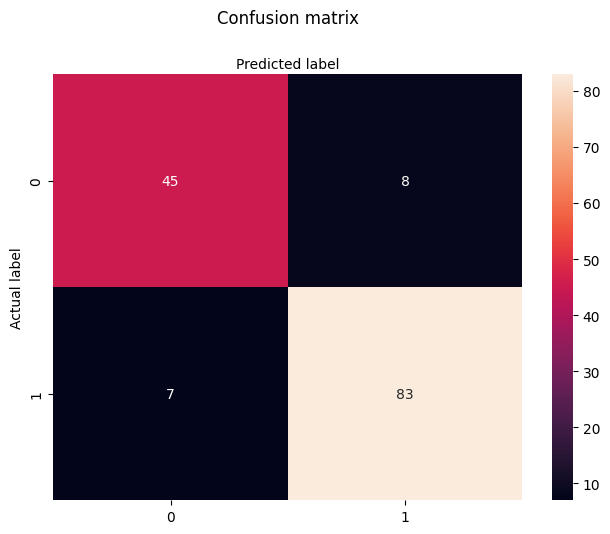

In [ ]:
categories = [0,1]
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)



sns.heatmap(pd.DataFrame(conf_mat), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Dummy classifier in SKlearn
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.8951048951048951
Precision: 0.9120879120879121
Recall: 0.9222222222222223


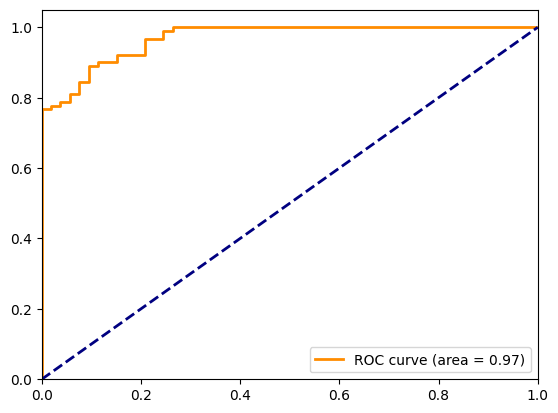

In [ ]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.show()
